id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dtype: int64

Oldest Data Point: 2016-01-01 00:00:17
Newest Data Point: 2016-06-30 23:59:39

Number of Distinct Vendors: 2

Stats for passenger_count:
Max: 9
Mean: 1.6645295219395548
Std Dev: 1.3142417173216943
Outlier Cutoff Value: 5.607254673904637


Stats for trip_duration:
Max: 3526282
Mean: 959.4922729603659
Std Dev: 5237.429929188888
Outlier Cutoff Value: 16671.78206052703




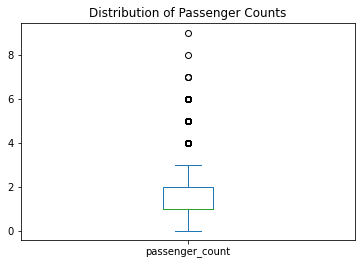

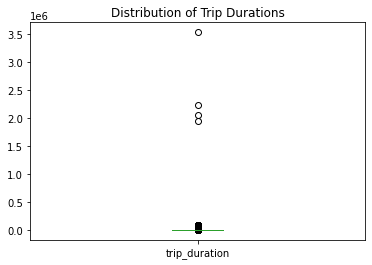

Total Records: 1458644
Trip Duration Outliers Removed: 2073
Passenger Count Outliers Removed: 64


After Removing Outliers:

Stats for passenger_count:
Max: 6
Mean: 1.6639913162106328
Std Dev: 1.3135572381938911
Outlier Cutoff Value: 5.604663030792306


Stats for trip_duration:
Max: 15900
Mean: 837.1426371448953
Std Dev: 661.355877095437
Outlier Cutoff Value: 2821.2102684312063




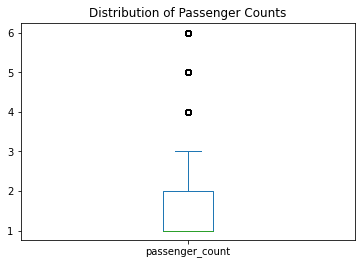

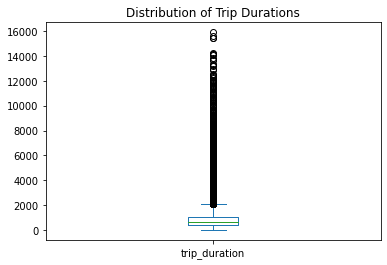

In [0]:
import math 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# returns the max value, mean, std deviation, and calculated outlier value based on a dataframe column
def getStats(column):
    max_value = np.max(column.astype(int))
    std_dev = np.std(column.astype(int))
    mean = np.mean(column.astype(int))
    outlier_value = mean + (3 * std_dev)
    return (max_value, mean, std_dev, outlier_value)

def showStats(dataFrame):
    for name, values in dataFrame.iteritems():
        result = getStats(values)
        print(f'Stats for {name}:\nMax: {result[0]}\nMean: {result[1]}\nStd Dev: {result[2]}\nOutlier Cutoff Value: {result[3]}\n\n')

    dataFrame['passenger_count'].plot(kind='box', title='Distribution of Passenger Counts')
    plt.show()

    dataFrame['trip_duration'].plot(kind='box', title='Distribution of Trip Durations')
    plt.show() 

data = spark.read.format("csv").option("header", "true").load("dbfs:/FileStore/shared_uploads/luke.couture@ucalgary.ca/train.csv").toPandas()

# check for null values
print(data.isnull().sum(axis = 0))

# copy numerical columns
number_column_names = ['passenger_count', 'trip_duration']
df = data[number_column_names].astype(int).copy()

print('\nOldest Data Point: ' + data['pickup_datetime'].min())
print('Newest Data Point: ' + data['pickup_datetime'].max() + '\n')

print('Number of Distinct Vendors: %d\n' % len(pd.unique(data['vendor_id'])))

# Show stats before removing any outliers
showStats(df)

# Drop outliers and any negative values if exist
outlier = getStats(df['trip_duration'])[3]
count_before = len(df['trip_duration'])
df.drop(df[(df.trip_duration.astype(int) > outlier) | (df.trip_duration.astype(int) < 0)].index, inplace=True)
count_after = len(df['trip_duration'])

print(f'Total Records: {count_before}')
print(f'Trip Duration Outliers Removed: {count_before - count_after}')

count_before = count_after
# Drop Taxi trips which have more than 6 Passengers
df.drop(df[(df.passenger_count.astype(int) > 6) | (df.passenger_count.astype(int) < 1)].index, inplace=True)
count_after = len(df['passenger_count'])
print(f'Passenger Count Outliers Removed: {count_before - count_after}\n\n')

# Show stats after removing outliers
print(f'After Removing Outliers:\n')
showStats(df)
